<a href="https://colab.research.google.com/github/RittickSR/marketPredictions/blob/master/Stock_Pred_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
rel_data=pd.read_csv('https://raw.githubusercontent.com/RittickSR/marketPredictions/master/marketData/RELIANCE.csv')

In [ ]:
rel_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5.097000e+03,5.097000e+03,2.247000e+03,4.583000e+03,4583.000000
mean,968.800824,970.235894,984.038817,955.105081,968.906092,969.089435,969.631030,5.186155e+06,5.047001e+14,1.243892e+05,2.179294e+06,0.440426
std,541.854956,543.235347,552.724884,531.387342,541.689022,541.854759,541.885341,4.267713e+06,5.510347e+14,9.884481e+04,1.796170e+06,0.144242
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,552.750000,555.000000,564.300000,545.600000,552.650000,552.950000,552.640000,2.784741e+06,2.145437e+14,7.000400e+04,1.164656e+06,0.329200
50%,921.000000,922.100000,932.500000,911.300000,920.450000,921.000000,922.390000,4.096597e+06,3.529453e+14,9.606200e+04,1.751404e+06,0.456400
75%,1151.400000,1151.250000,1174.700000,1128.000000,1152.000000,1152.300000,1148.050000,6.245328e+06,6.133209e+14,1.439110e+05,2.604270e+06,0.548000
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,8.835030e+15,1.194059e+06,3.495888e+07,0.978300


# EXPLANATION OF STATS

**Prev close:** It gives the previous day's closing price

**Open:** Price of stock when first traded on that day.

**High:** Highest Price for given day

**Low:** Lowest price for given day

**Last:** Price at which last trade occured

**Close:** It is the final price at which it trades during regular market hours on any given day. The closing price is considered the most accurate valuation of a stock or other security until trading resumes on the next trading day.

Difference between **Last Trading Price** **(LTP)** and **Closing Price** is that **LTP is the price of the last trade** at any given time and** Closing price is the volume weighted average of all the trades that were done during the last half an hour** of the trading session i.e between 3 pm to 3.30 pm. 

Eg: If 1000 shares of SBI are traded at 276,500 shares at 277 and 1200 shares at 275 during the last half on hour on NSE,then the closing price would be
(276000+138500+330000)/2700=275.75(adjusted to the nearest paisa)

**VWAP:** Volume Weighted Average Price (VWAP) is given by ­­Σ(Price*Volume)/ΣVolume. It is better to buy below VWAP and sell above it. It is not needed for prediction as such but is required for assesment.

**Volume:** Amount of stock traded during the day.

**Share turnover:** It is a measure of stock liquidity calculated by dividing the total number of shares traded over a period by the average number of shares outstanding for the period. Investors may be unwilling to put their money at risk by acquiring the shares of a company with low share turnover

**Trades:** Number of trads conducted in the day

**Deliverable Shares:** The quantity of shares that actually "changed hands" in the period of the day in question.

**%Deliverable:** The % of shares out of the total outtstanding shares which "changed hands" 

In [ ]:
rel_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


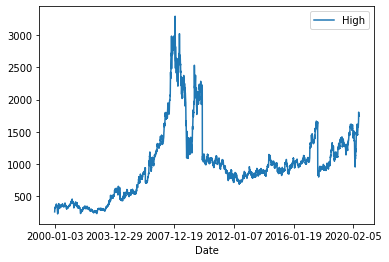

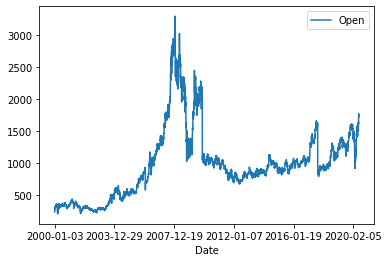

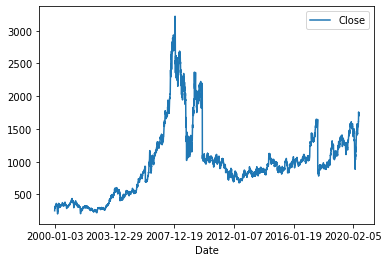

In [ ]:
rel_data.plot(x='Date',y='High',kind='line')
rel_data.plot(x='Date',y='Open',kind='line')
rel_data.plot(x='Date',y='Close',kind='line')

As we can see from the above graph the Reliance share hit an all time high around December of 2007. Checking headlines from the same timeperiod we get the following:
(All screenshots were taken from capitalmarketplus website)
[Net Profit Rise](https://drive.google.com/file/d/1lc9_r33PSREHMQsdiMjjMHGNZAFiLXIu/view?usp=sharing)
But then on the 11th of december the following news is announced:
[Reliance signs contract in Colombia](https://drive.google.com/file/d/1SXLdOHEfLfJOIAc4k-18P7t1akAUDqbh/view?usp=sharing)
Which leads to the sudden fall after the peak that can be seen and is further confirmed by the following article
[Sudden descrease in stock prices](https://drive.google.com/file/d/1vIUnUuP2okMKoUaRIQ-LSzfSrhYGyXxj/view?usp=sharing)


**Looking at the above graph a simple regression model should be good enough to deal with the data based just on historical stock open and close prices**

In [ ]:
#This line is used to change 'Prev Close' to 'Prev_Close' so that we can access it as it would give error with space
rel_data.columns = [c.replace(' ', '_') for c in rel_data.columns]

Since our data to be used for prediction all lie in the hundreds hence we do not need to normalize them as all our independent variables lie in the same value range.

**NOTE**: We will only use Open and Previous Close value of the share in question because these are the only values which will be avalible to us at the start of the trading day. Values such as High or Low isnt known at the start as well as Close and Volume of value traded.



In [ ]:
from sklearn.model_selection import train_test_split
x_data=rel_data[['Open','Prev_Close']]
y_data=rel_data['VWAP']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True) 

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4077, 2)
(1020, 2)
(4077,)
(1020,)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse=sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
print("RMSE is :",rmse)

RMSE is : 23.70100598712896


**NOTE**: The RMSE value is given by square root of the mean squared error hence it depends on the scale of the predictions and test data. So in our example an RMSE of 23.70100 represents an error of ₹23 on the VWAP value of the reliance share in question. Our model is now ready to make predictions based on the 'Open' and the 'Prev Close' value which will be avalible to us at the start of the trading day.

In [ ]:
def buy_or_sell(op,prev,buy_price):
  ip=[[op,prev]]
  ch=model.predict(ip)
  print("VWAP is :",ch)
  if(ch<buy_price):
    print("HOLD!!")
  else:
    print("SELL")

In [ ]:
buy_or_sell(1845,1843,1775)

VWAP is : [1843.24464141]
SELL


Today's data is being used above an on doing a bit of googling we can see that today's VWAP was 1878.38 which is approx ₹35 off from our prediction. Hence the model will work fine on a macro level but for a micro level a more sopisticated model will be needed.